# Test of classifcation Fastai tokenization

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

In [2]:
from fastai import *
from fastai.text import *

In [3]:
from ulmfit.train_clas import *

In [4]:
exp = CLSHyperParams('data/imdb', qrnn=False,tokenizer='f', lang='en', cuda_id=0)

Batch size: 70
Max vocab: 60000
Cache dir: data/imdb/models/f60k
Model dir: data/imdb/models/f60k/lstm_None.m


In [5]:
exp.pretrained_model = URLs.WT103_1
exp.drop_mult=0.3

In [6]:
data_clas, data_lm = exp.load_cls_data(bs=40,force=False, use_test_for_validation=True)

Saving tokenized: cls.trn 25000, cls.val 25000
Size of vocabulary: 60002
First 20 words in vocab: ['xxunk', 'xxpad', 'xxmaj', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', '"', "'s", '-', '\n\n']


In [7]:
data_lm.train_dl.batch_size

40

In [8]:
learn = exp.create_lm_learner(data_lm)

true_wd:  False


In [9]:
learn.true_wd=True
learn.opt=None

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


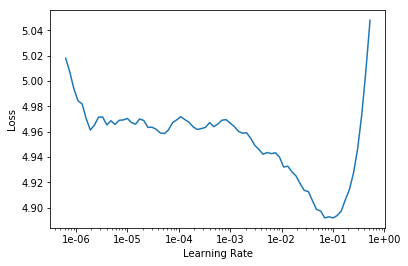

In [11]:
learn.recorder.plot(skip_end=15)

In [13]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

Total time: 23:05
epoch  train_loss  valid_loss  accuracy
1      4.216088    4.007746    0.300710  (23:05)



In [14]:
learn.save('fit_head')

In [15]:
learn.load('fit_head');

In [16]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7))

Total time: 8:42:10
epoch  train_loss  valid_loss  accuracy
1      3.969496    3.845486    0.315829  (26:05)
2      3.918823    3.763834    0.326209  (26:03)
3      3.839340    3.699592    0.335176  (26:08)
4      3.806484    3.647501    0.342129  (26:06)
5      3.774351    3.600486    0.347226  (26:12)
6      3.743252    3.558260    0.352164  (26:09)
7      3.699686    3.523352    0.356172  (26:09)
8      3.713620    3.493051    0.360080  (26:11)
9      3.655959    3.463499    0.363502  (26:11)
10     3.639268    3.436016    0.366489  (26:08)
11     3.612611    3.406506    0.370597  (26:11)
12     3.583289    3.374530    0.374582  (26:07)
13     3.538116    3.351603    0.378152  (26:08)
14     3.525463    3.321655    0.382012  (26:06)
15     3.490068    3.292532    0.385994  (26:08)
16     3.455298    3.272834    0.388984  (26:11)
17     3.408465    3.253918    0.391583  (26:05)
18     3.420946    3.241025    0.393331  (25:56)
19     3.382529    3.235213    0.394229  (25:57)
20     3.

In [22]:
learn.save("afteroom")

In [18]:
learn.load("afteroom");

In [19]:
learn.validate()

[3.2334335, tensor(0.3944)]

In [20]:
# odl: [3.6938994, tensor(0.3338)]

In [21]:
learn.save_encoder("enc_best")
learn.save("lm_best", with_opt=False)

# Classification

## Validation = 100% of test

In [7]:
exp.drop_mult=0.5
learn=exp.create_cls_learner(data_clas)

In [8]:
learn.true_wd=True

In [9]:
learn.load_encoder('enc_best')
learn.freeze()

In [10]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 04:03
epoch  train_loss  valid_loss  accuracy
1      0.286372    0.176776    0.933840  (04:03)



In [11]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 04:21
epoch  train_loss  valid_loss  accuracy
1      0.235155    0.160959    0.940560  (04:21)



In [12]:
learn.save("2")

In [13]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 05:38
epoch  train_loss  valid_loss  accuracy
1      0.213980    0.148502    0.946840  (05:38)



In [14]:
learn.save("3")

In [15]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 13:45
epoch  train_loss  valid_loss  accuracy
1      0.198522    0.153674    0.947800  (06:52)
2      0.169954    0.157253    0.947320  (06:52)



In [16]:
learn.save("all")

## Validation = 10% of train

In [17]:
data_clas, data_lm = exp.load_cls_data(bs=40,force=False, use_test_for_validation=False)

Tokenized data loaded, lm.trn 90000, lm.val 10000
Tokenized data loaded, cls.trn 22500, cls.val 2500
Size of vocabulary: 60002
First 20 words in vocab: ['xxunk', 'xxpad', 'xxmaj', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', '"', "'s", '-', '\n\n']


In [18]:
exp.drop_mult=0.5
learn=exp.create_cls_learner(data_clas)
learn.true_wd=True

In [19]:
learn.load_encoder('enc_best')
learn.freeze()

In [20]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 02:43
epoch  train_loss  valid_loss  accuracy
1      0.288307    1.597378    0.575200  (02:43)



In [21]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 03:08
epoch  train_loss  valid_loss  accuracy
1      0.246644    0.435174    0.779200  (03:08)



In [22]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 04:19
epoch  train_loss  valid_loss  accuracy
1      0.202743    0.212411    0.923200  (04:19)



In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 10:51
epoch  train_loss  valid_loss  accuracy
1      0.189055    0.162822    0.944000  (05:25)
2      0.168473    0.165473    0.941600  (05:25)



In [24]:
learn.save("valid")

# Running models on testset
There is a small bug that does not let us use test_ds so we load the test set in to valid_ds and run validate() on that data set

In [25]:
data_clas, data_lm = exp.load_cls_data(bs=40,force=False, use_test_for_validation=True)

Tokenized data loaded, lm.trn 90000, lm.val 10000
Tokenized data loaded, cls.trn 25000, cls.val 25000
Size of vocabulary: 60002
First 20 words in vocab: ['xxunk', 'xxpad', 'xxmaj', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', '"', "'s", '-', '\n\n']


In [26]:
learn=exp.create_cls_learner(data_clas)

In [33]:
learn.load('valid');

In [29]:
learn.validate()

[0.15947564, tensor(0.9483)]

In [34]:
learn.load("all");

In [35]:
learn.validate()

[0.15725298, tensor(0.9473)]